# **Initial Filtering**

## **Problem Statement: Perceptions of surplus food and barriers to consumption**

In [30]:
import pandas as pd
from matplotlib import pyplot as plt

## **Reading The Files**

In [31]:
df1_path = "XDS Sustainability IRL Event Data x IG Posts x P5Y.parquet"
df1 = pd.read_parquet(df1_path, engine='fastparquet')

df1.head()

,user_id,user_name,post_id,post_shortcode,post_type,post_date,post_caption,post_tagged_users,post_hashtags,post_mentions,post_comments,post_likes,segment_name
0,5db747f4e877ca2f15e72df13b06fd562df48403b95392...,stirring-elegant-hyrax-of-cubism,2612549219862254592,CRBo6xwHRNF,image,2021-07-07 12:15:58,Collin Tomahawk . Thank you @anonymised_user f...,None,None,None,0.0,14.0,Optimistic Providers
1,5db747f4e877ca2f15e72df13b06fd562df48403b95392...,thick-curassow-of-stimulating-authority,2579202108475507200,CPLKqcHnwJx,image,2021-05-22 12:01:12,I start to play with all kinds of ingredients ...,None,None,None,1.0,18.0,Optimistic Providers
2,5db747f4e877ca2f15e72df13b06fd562df48403b95392...,smooth-wondrous-barracuda-of-promise,2557245600699490304,CN9KVMxH5-g,image,2021-04-22 04:57:32,Crocheted hand sanitizer pouches and sew token...,None,None,None,1.0,26.0,Optimistic Providers
3,5db747f4e877ca2f15e72df13b06fd562df48403b95392...,hopping-nebulous-tanuki-of-improvement,2542861564795380224,CNKDx7an2FX,image,2021-04-02 08:39:02,Thank you @anonymised_user for this beautiful ...,None,None,None,2.0,19.0,Optimistic Providers
4,5db747f4e877ca2f15e72df13b06fd562df48403b95392...,enormous-booby-of-unreal-youth,2539242947717388288,CM9NAHpHFiX,image,2021-03-28 08:49:29,Thank you neighbour @anonymised_user and Amigo...,None,None,None,0.0,19.0,Optimistic Providers


In [32]:
len(df1)

404862

In [33]:
df2_path = "XDS Sustainability IRL Event Data x TW Posts x P1Y.parquet"
df2 = pd.read_parquet(df2_path, engine='fastparquet')

df2.head()

,user_id,user_name,post_id,post_date,post_content,post_is_retweet,post_is_truncated,post_like_count,post_retweet_count,post_media,post_hashtags,post_user_mentions,post_reply_to_post_id,segment_name
0,92c7f7363deda546240a9b63d8a279d22c3f018329cd2a...,spiked-determined-dragonfly-of-awe,1439238781253550085,Sat Sep 18 22:43:59 SGT 2021,@anonymised_user Pah zhiam bueh pah zhiam bueh...,False,False,0,0,None,None,None,1439238542224281601,Pragmatic heartlanders
1,92c7f7363deda546240a9b63d8a279d22c3f018329cd2a...,congenial-porcupine-of-pragmatic-enrichment,1405849658295918594,Fri Jun 18 19:27:32 SGT 2021,The current active #Covid19 #clusters in #Sing...,True,False,0,70,photo,Covid19 | clusters | Singapore,None,-1,Pragmatic heartlanders
2,92c7f7363deda546240a9b63d8a279d22c3f018329cd2a...,rebel-hissing-waxbill-of-pride,1396027145386795009,Sat May 22 16:56:23 SGT 2021,Somehow...I feel it coming. . . Judging from t...,True,False,0,117,None,None,None,-1,Pragmatic heartlanders
3,92c7f7363deda546240a9b63d8a279d22c3f018329cd2a...,stoic-psychedelic-squirrel-of-vigor,1388764925808447491,Sun May 02 15:58:54 SGT 2021,Pronunciation of AZ. . British: A-Zed. America...,True,False,0,15,None,None,None,-1,Pragmatic heartlanders
4,92c7f7363deda546240a9b63d8a279d22c3f018329cd2a...,handsome-famous-cassowary-of-glee,1377044390074404864,Wed Mar 31 07:45:41 SGT 2021,"Since April Fools Day is fast approaching,. th...",True,False,0,47840,photo,None,None,-1,Pragmatic heartlanders


In [34]:
len(df2)

463815

## **Analyze Event Data of IG**

### **Finding Important Hashtags where the Post Caption Contains the Word "surplus"**

To look at the posts that are talking about surplus food, the simplest way to find it is filtering the captions based on the word "surplus" and finding the most frequently appearing hashtags as more unbiased word filter in the hashtags section. Therefore, the first goal is to find the most significant hashtags in both of the acquired data.

In [35]:
keywords = "surplus" or "food"

#Match the words in post_caption with keywords, drop row if no match
df1_kw = df1.loc[df1.post_caption.str.contains(keywords) == True] #kw stands for keyword
df1_kw = df1_kw.reset_index(drop = True) #just to make the index start from 0, 1, 2, 3, ...
df1_kw.head(5)

,user_id,user_name,post_id,post_shortcode,post_type,post_date,post_caption,post_tagged_users,post_hashtags,post_mentions,post_comments,post_likes,segment_name
0,dd710d44d2e9aab378d7aade54ad905ff6cec708798491...,inventive-outstanding-hyrax-of-climate,2145908354904938496,B3HzEd-ptaV,image,2019-10-02 16:03:52,we are always in search of the perfect tote wi...,None,#madeinindia|#sustainablelivelihoods|#sustaina...,None,0.0,57.0,Eco Changemakers
1,7e3da989912298664408f9c04c4719f1c7f99adc5e026e...,zippy-spry-coyote-from-heaven,2065766183910779904,ByrE2Y9BCq9,image,2019-06-14 02:15:40,As the first hotel in Southeast Asia to introd...,None,#sustainablehospitality|#recycled|#global|#com...,None,0.0,30.0,Eco Changemakers
2,32118c6a74ad86e8a94c47d56ea2bfe1a09e5bcae85e5b...,fanatic-keen-seahorse-of-potency,2227760228653154304,B7qmB_xnT-z,video,2020-01-23 14:31:06,HOW TO LOU HEI brought to you by Daydream and ...,None,#yearoftherat|#huatah|#louheiyusheng|#chinesef...,None,4.0,45.0,Socially Engaged Mavens
3,4e0e904a85f845f8beebee8d5f6ad0e9980bd228425224...,satisfied-fair-sturgeon-of-growth,2450061487857495040,CIAXfE1nGuU,image,2020-11-25 07:41:51,| reduce food loss * #sp #treedotseats \nIt wa...,None,#sgeats|#singaporefood|#sghomecooks|#sgfoodies...,None,2.0,59.0,Eco Changemakers
4,9f649cdc94db5006931844c6c03270b38275313cbb383a...,outgoing-curvy-herring-of-recreation,2237548041057776128,B8NXhabHrJt,image,2020-02-06 02:35:34,When I first learned how to dumpster dive 3 ye...,None,None,None,0.0,23.0,Eco Changemakers


In [36]:
len(df1_kw)

57

In [37]:
keyword_count = df1_kw.post_caption.str.count(keywords)
keyword_count.head(5)

0    1
1    1
2    1
3    1
4    1
Name: post_caption, dtype: int64

In [38]:
# Splitting strings in post_hashtags column so each hashtag can be accessed as part of a list
for i in range(len(df1_kw.post_hashtags)):
    # There are NoneType and String data
    # As the split() method can only work on string data, we need to use python error handling
    try:
        df1_kw['post_hashtags'][i] = df1_kw.post_hashtags[i].split('|')
    except:
        pass

C:\Users\AW\AppData\Local\Temp/ipykernel_8700/2150378566.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_kw['post_hashtags'][i] = df1_kw.post_hashtags[i].split('|')


In [39]:
#Checking whether the post_hashtags column has been split or not
df1_kw.post_hashtags.head()

0    [#madeinindia, #sustainablelivelihoods, #susta...
1    [#sustainablehospitality, #recycled, #global, ...
2    [#yearoftherat, #huatah, #louheiyusheng, #chin...
3    [#sgeats, #singaporefood, #sghomecooks, #sgfoo...
4                                                 None
Name: post_hashtags, dtype: object

### **How many times does each hashtag appears?**

In [40]:
ig_hashtags_combine = [] #This variable will be used to store the all the available hashtag values as a string

#if entry in post_hashtags is a list --> take each entry in the list and store to ig_hashtags_combine
for i in range(len(df1_kw.post_hashtags)):
    if type(df1_kw.post_hashtags[i]) == list:
        for j in df1_kw.post_hashtags[i]:
            ig_hashtags_combine.append(j)

ig_hashtags_combine = pd.Series(k for k in ig_hashtags_combine)
ig_hashtags_combine.head()

0               #madeinindia
1    #sustainablelivelihoods
2          #sustainablebrand
3          #womenempowerment
4                #bagaddicts
dtype: object

In [41]:
#ig_hashtags_combine needs to be converted to a Series due to the availability of value_counts() method when used on a pandas Series
ig_hashtags_count = ig_hashtags_combine.value_counts() #This variable stores the number of counts for every unique value in ig_hashtags_combine
ig_hashtags_count.head()

#sgfood              7
#sustainable         6
#sgfoodies           6
#singaporefood       6
#goodfoodpeoplesg    5
dtype: int64

### **From how many number of occurences should we start choosing?**

In [42]:
#See how many times each count appears (frequency for every count)
ig_hashtags_count_freq = ig_hashtags_count.value_counts().sort_index()
ig_hashtags_count_freq

1    205
2     38
3      5
4      4
5     12
6      3
7      1
dtype: int64

Text(0, 0.5, 'Frequency')

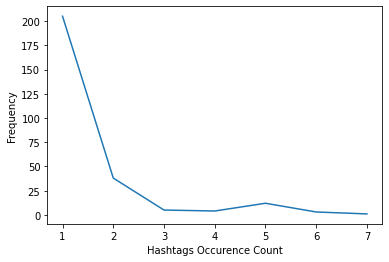

In [43]:
#To visualize how skewed the data is, a plot can be used
plt.plot(ig_hashtags_count_freq.index,ig_hashtags_count_freq)
plt.xlabel('Hashtags Occurence Count')
plt.ylabel('Frequency')

In [44]:
#The data is very skewed to the smaller Hashtags Occurence Count side
#Therefore, we don't have to worry about picking a larger number for the start of the ig_hashtags_count as it gives a tighter selection, 
#yet keeping it unbiased.

#Select from 0.95 quantile
ig_min_hash_count = ig_hashtags_count.quantile(0.95)
ig_min_hash_count

5.0

In [45]:
ig_hashtags_count = ig_hashtags_count[ig_hashtags_count >= ig_min_hash_count] #Filter the Series based on the number of counts
ig_important_hashtags = ig_hashtags_count.index.to_list()
print(ig_important_hashtags,len(ig_important_hashtags))

['#sgfood', '#sustainable', '#sgfoodies', '#singaporefood', '#goodfoodpeoplesg', '#vegan', '#meatless', '#plantbasedfoods', '#eatwideawake', '#homecoking', '#cookingmadeeasy', '#plantbaseddiet', '#igsgfoodies', '#goodfoodpeople', '#vegetarian', '#sustainability'] 16


In [46]:
#As can be seen these are the most important hashtags we need to look at
#To save it, we can also put those in a txt file
with open('ig_important_hashtags.txt', 'w') as f:
    for i in ig_important_hashtags:
        f.write(i)
        f.write('\n')

## **Analyze Event Data of TW**

### **Finding Important Hashtags where the Post Content Contains the Word "surplus"**

The same method will be used with the IG data, but the post_caption and post_likes will be replaced to post_content and post_retweet_count, as they are equivalent in their significance.

In [47]:
keywords = "surplus" or "food"

#Match the words in post_caption with keywords, drop row if no match
df2_kw = df2.loc[df2.post_content.str.contains(keywords) == True]
df2_kw = df2_kw.reset_index(drop = True) #to make the index 0, 1, 2, 3, ...
df2_kw.head(5)

,user_id,user_name,post_id,post_date,post_content,post_is_retweet,post_is_truncated,post_like_count,post_retweet_count,post_media,post_hashtags,post_user_mentions,post_reply_to_post_id,segment_name
0,3575a71ae2a773a701cf1c9dc77de7007a8bef07b62042...,sly-coral-barnacle-of-warranty,1418585511317282819,Fri Jul 23 22:55:16 SGT 2021,What has the #US done at home & offered to the...,True,False,0,78,None,US | virus,None,-1,Pragmatic heartlanders
1,c95f4fcdc0c23acbaf9e5f2daabc3236662cb124194c28...,fantastic-enigmatic-ostrich-of-temperance,1396456740967751683,Sun May 23 21:23:26 SGT 2021,Our video Horde shows us what could happen if ...,True,False,0,8,video,COVID19,None,-1,Pragmatic heartlanders
2,c75f29a1c267c02aa613951ac300c49378b74488b52817...,polite-brave-coyote-of-joviality,1302894929342070785,Mon Sep 07 17:02:12 SGT 2020,Egypt is weighing a plan to sell its surplus p...,True,False,0,36,None,None,None,-1,Eco Changemakers
3,7c0c65d81f223dd1c7580f640ef3a30ce1184bbd6efa7e...,whispering-stereotyped-bug-of-amplitude,1412718779197390855,Wed Jul 07 18:22:58 SGT 2021,@anonymised_user surplus char siew,False,False,0,0,None,None,None,1412718376045080581,Eco Changemakers
4,cdaf39637d300126f3aba788076577669744391e0fab3a...,cherubic-tireless-giraffe-of-vigor,1395595309904908291,Fri May 21 12:20:25 SGT 2021,@anonymised_user @anonymised_user The surplus ...,False,False,0,0,None,None,None,1395589940734357509,Eco Futurists


In [48]:
len(df2_kw) #Checking the row size

39

In [49]:
for i in range(len(df2_kw.post_hashtags)):
    # There are NoneType and String data
    # As the split() method can only work on string data, we need to use python error handling
    if (type(df2_kw.post_hashtags[i]) == str):
        df2_kw['post_hashtags'][i] = df2_kw.post_hashtags[i].split('|')
    else:
        pass

C:\Users\AW\AppData\Local\Temp/ipykernel_8700/4111390066.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_kw['post_hashtags'][i] = df2_kw.post_hashtags[i].split('|')


In [50]:
df2_kw.head()

,user_id,user_name,post_id,post_date,post_content,post_is_retweet,post_is_truncated,post_like_count,post_retweet_count,post_media,post_hashtags,post_user_mentions,post_reply_to_post_id,segment_name
0,3575a71ae2a773a701cf1c9dc77de7007a8bef07b62042...,sly-coral-barnacle-of-warranty,1418585511317282819,Fri Jul 23 22:55:16 SGT 2021,What has the #US done at home & offered to the...,True,False,0,78,None,"[US , virus]",None,-1,Pragmatic heartlanders
1,c95f4fcdc0c23acbaf9e5f2daabc3236662cb124194c28...,fantastic-enigmatic-ostrich-of-temperance,1396456740967751683,Sun May 23 21:23:26 SGT 2021,Our video Horde shows us what could happen if ...,True,False,0,8,video,[COVID19],None,-1,Pragmatic heartlanders
2,c75f29a1c267c02aa613951ac300c49378b74488b52817...,polite-brave-coyote-of-joviality,1302894929342070785,Mon Sep 07 17:02:12 SGT 2020,Egypt is weighing a plan to sell its surplus p...,True,False,0,36,None,None,None,-1,Eco Changemakers
3,7c0c65d81f223dd1c7580f640ef3a30ce1184bbd6efa7e...,whispering-stereotyped-bug-of-amplitude,1412718779197390855,Wed Jul 07 18:22:58 SGT 2021,@anonymised_user surplus char siew,False,False,0,0,None,None,None,1412718376045080581,Eco Changemakers
4,cdaf39637d300126f3aba788076577669744391e0fab3a...,cherubic-tireless-giraffe-of-vigor,1395595309904908291,Fri May 21 12:20:25 SGT 2021,@anonymised_user @anonymised_user The surplus ...,False,False,0,0,None,None,None,1395589940734357509,Eco Futurists


In [51]:
tw_hashtags_combine = []

#if entry in post_hashtags is a list --> take each entry in the list and store to hashtags_contain
for i in range(len(df2_kw.post_hashtags)):
    if type(df2_kw.post_hashtags[i]) == list:
        for j in df2_kw.post_hashtags[i]:
            tw_hashtags_combine.append(j)

tw_hashtags_combine = pd.Series(k for k in tw_hashtags_combine)
tw_hashtags_combine

0                     US 
1                   virus
2                 COVID19
3                   solar
4            surplusfood 
5           Courtauld2025
6                 covid19
7         firstusepolicy 
8          makegoodhappen
9     christmasleftovers 
10             plantbased
dtype: object

### **How many times does each of them occur?**

In [52]:
tw_hashtags_count = tw_hashtags_combine.value_counts()

#Display everything in the series
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(tw_hashtags_count)

US                     1
 virus                 1
COVID19                1
solar                  1
surplusfood            1
 Courtauld2025         1
covid19                1
firstusepolicy         1
 makegoodhappen        1
christmasleftovers     1
 plantbased            1
dtype: int64


In [53]:
#Show how many times the tw_hashtags_count appear
tw_hashtags_count_freq = tw_hashtags_count.value_counts().sort_index()
tw_hashtags_count_freq

1    11
dtype: int64

### **How can we select the significant hashtags in this data?**

As there is little data on this, we can manually pick which hashtags we want based on what the names mean with the help of google search.

In [54]:
#Choose manually
tw_important_hashtags = ['surplusfood', 'Courtauld2025', 'christmasleftovers','plantbased']
print(tw_important_hashtags, len(tw_important_hashtags))

['surplusfood', 'Courtauld2025', 'christmasleftovers', 'plantbased'] 4


In [55]:
#Store data in txt file just to be safe
with open('tw_important_hashtags.txt', 'w') as f:
    for i in tw_important_hashtags:
        f.write(i)
        f.write('\n')

## **Closure for Initial Filtering Part**

Now we have selected the hashtags that we want both from instagram and twitter. Later on, these hashtags will be used to filter both instagram and twitter event data tables on their respective post_hashtags column. However, as python is relatively slow in processing very large data, we will use a faster tool, SQL, to filter out these hashtags in part 2.

In [56]:
#Instagram Hashtags
for i in ig_important_hashtags:
    print(i)

#sgfood
#sustainable
#sgfoodies
#singaporefood
#goodfoodpeoplesg
#vegan
#meatless
#plantbasedfoods
#eatwideawake
#homecoking
#cookingmadeeasy
#plantbaseddiet
#igsgfoodies
#goodfoodpeople
#vegetarian
#sustainability


In [57]:
#Twitter hashtags
for i in tw_important_hashtags:
    print(i)

surplusfood
Courtauld2025
christmasleftovers
plantbased
